## Taller 1.3 Dinámica
Andrea Sofía Daza
202122293

### Problema a


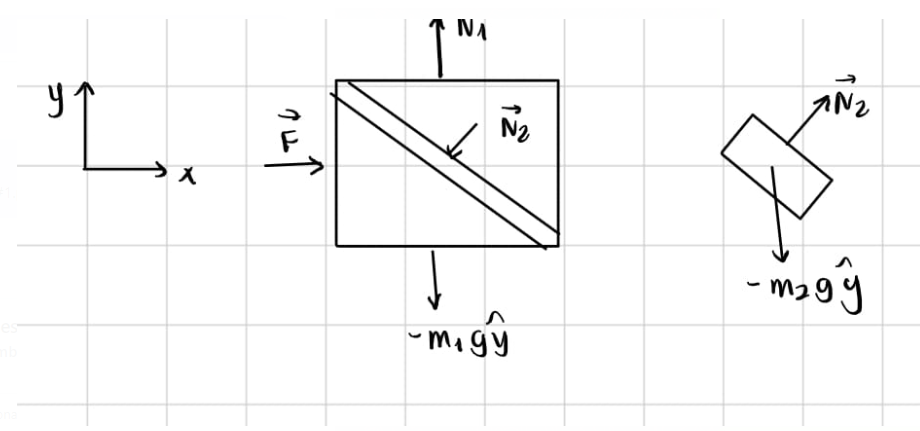

In [1]:
import sympy
import numpy as np
from sympy.physics.vector import ReferenceFrame


# Parametros del sistema
m1 = 8 #Masa del carrito [kg]
m2 = 1 #Masa del collarin [kg]
g = 9.81 #Gravedad [m/s2]

# Definimos un marco de referencia global
N = ReferenceFrame('N')
# Definimos un marco rotado 60deg respecto a N (alineado con el collarin)
B = N.orientnew('B','axis',(np.deg2rad(60),N.z))

# Incognitas escalares
#f: magnitud de la fuerza con la que empujo el carro
#n1: la magnitud de la normal entre el piso y el carro
#n2: la magnitud de la normal entre el collarin y el carro
#a: aceleración en x del carro (igual a la del collarín)

f,n1,n2,a=sympy.symbols('f,n1,n2,a')

# Con la segunda ley sabemos que la suma de fuerzas produce cambio de momentum
# F=ma:

#Fuerzas en carro: Fcarro=m1*a1
sumF1 = -m1*g*N.y + f*N.x + n1*N.y - n2*B.x

#Fuerzas en collarín: Fcollarin=m2*a2
sumF2 = -m2*g*N.y + n2*B.x

# Creamos ecuaciones de la forma f(vars)=0
eq1 = sumF1 - m1*a*N.x
eq2 = sumF2 - m2*a*N.x

# Resolvemos el arreglo de ecuaciones escalares usando solve. 
# Note que se usa producto punto con los vectores unitarios de N.
# para encontrar las componentes.
sympy.solve([eq1.dot(N.x),eq1.dot(N.y),eq2.dot(N.x),eq2.dot(N.y)],[f,n1,n2,a])

{f: 50.9742552667520,
 n1: 88.2900000000000,
 n2: 11.3276122815005,
 a: 5.66380614075023}

In [2]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt

### Punto b

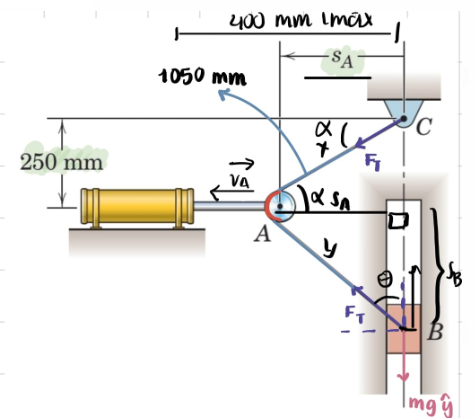
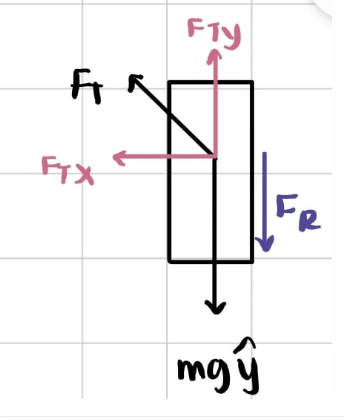

4. Grafique la posición de la masa B (rojo) para valores de s entre 100m y 400mm. Para el
instante en el que s=225mm, encuentre la posición de la masa B.

Valores de alpha (en grados): [68.19859051364818, 67.60240204717516, 67.01128319791937, 66.42529379808738, 65.84448835471062, 65.2689161541368, 64.69862137458027, 64.13364320590549, 63.574015975833134, 63.019769281777144, 62.470928127543374, 61.927513064147035, 61.38954033403478, 60.85702201802826, 60.32996618433945, 59.80837703904239, 59.29225507742156, 58.781597235653635, 58.27639704231597, 57.776644769252115, 57.28232758136067, 56.79342968491047, 56.309932474020215, 55.83181467497466, 55.35905248808371, 54.891619726822185, 54.4294879540193, 53.9726266148964, 53.521003166779174, 53.07458320533762, 52.6333305872313, 52.197207549061474, 51.766174822553054, 51.34019174590991, 50.919216371305524, 50.50320556848864, 50.09211512449896, 49.6858998395027, 49.2845136187706, 48.88790956083307, 48.49604004185734, 48.10885679630126, 47.72631099390626, 47.3483533130996, 46.974934010881974, 46.606002989282246, 46.24150985846518, 45.88140399658213, 45.525634606457615, 45.1741507692066, 44.826901494

C:\Users\dazam\AppData\Local\Temp/ipykernel_29396/3666854568.py:58: RuntimeWarning: invalid value encountered in arcsin
  omega = np.arcsin(sA / y)


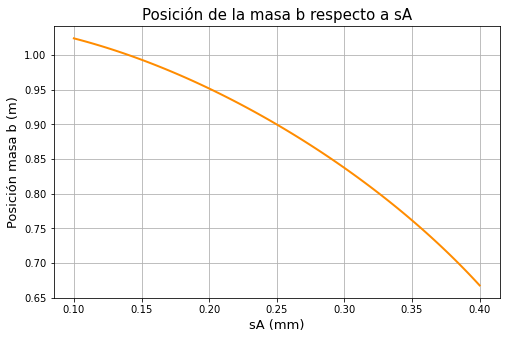

In [5]:
import numpy as np

h = 0.25 #altura constante
sA_i = 0.100 #distancia de C a A
l = 1.050 #longitud del cable
alpha = np.arctan(h / sA_i) #ángulo respecto a eje x
alpha_g = np.rad2deg(alpha) #se convierte a grados

sA_valores = np.linspace(0.100, 0.400, 100) #se evalua en el rango establecido de 100 a 400 mm.

alpha_valores = [] #se crea lista para evaluar la variación de alpha a medida que aumenta sA
x_valores = []
y_valores = []
omega_valores = []
sb_valores = []  # Aquí almacenaremos los valores de sb

#se evalúa cada variación en sA para ver la variación de posición de la masa de 0.5 kg
for sA in sA_valores:
    alpha = np.arctan(h / sA)
    alpha_g = np.rad2deg(alpha)
    alpha_valores.append(alpha_g)
    
    x = h / np.sin(alpha)
    x_valores.append(x)
    
    y = abs(l - x)
    y_valores.append(y)
    
    omega = np.arcsin(sA / y)
    omega_g = np.rad2deg(omega)
    omega_valores.append(omega_g)
    
    sb = h+(sA / np.tan(omega)) # Cálculo de sb
    sb_valores.append(sb)

print("Valores de alpha (en grados):", alpha_valores)
print("Valores de x:", x_valores)
print("Valores de y:", y_valores)
print("Valores de omega (en grados):", omega_valores)
print("Valores de sb:", sb_valores)  # Imprime los valores de sb

x = sA_valores
y = sb_valores
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))
plt.title('Posición de la masa b respecto a sA', fontsize=15) # Título
plt.ylabel('Posición masa b (m)', fontsize=13) # Etiqueta eje vertical
plt.xlabel('sA (mm)', fontsize=13) # Etiqueta eje horizontal
plt.plot(x, y, color='darkorange', linewidth=2)
plt.grid()

#Hallar el valor de SB cuando sA = 225
sA = 225
alpha = np.arctan(h / sA)
x = h / np.sin(alpha)
y = abs(l - x)
omega = np.arcsin(sA / y)
sb = sA / np.tan(omega)
print(sb)
#Nota: el punto de referencia es donde está el punto C, por lo cual la distancia de la masa B irá disminuyendo, siendo el punto inicial de B la distancia máxima.


5. En el instante en que s = 225 mm el actuador se está retrayendo a una velocidad de 100 mm/s. Usted quiere llevar el actuador a alcanzar una velocidad de 500 mm/s en al menos un segundo y para esto acelera de manera constante. Encuentre qué tensión tendría la cuerda en este instante suponiendo que no hay fricción. 

![Alt text](image-16.png)
![Alt text](image-17.png)

In [6]:
#Aceleración= delta velocidad/delta tiempo
v_f = 500 #velocidad final
v_i = 100 #velocidad inicial
d_tiempo = 1 #tiempo requerido para llevar el objeto de 100 mm/s a 500 mm/s.

acel = v_f-v_i/d_tiempo
#Debo convertir de mm/s^2 a m/s
acel_1 = acel/1000
acel

sA_1 = 225
alpha_1 = np.arctan(h / sA_1)
x_1 = h / np.sin(alpha_1)
y_1 = abs(l - x_1)
omega_1 = np.arcsin(sA_1 / y_1)
omega_g_1 = np.rad2deg(omega_1)

Ft = acel_1/(np.cos(alpha)+np.cos(np.deg2rad(90-omega_g_1)))
#Unidades de Ft son Newtons
Ft

0.4064044550022179

6. Encuentre qué tensión tendría la cuerda para el punto anterior si suponemos una fricción u = 0.4 actuando entre la guía y el deslizador B.

In [7]:
#Se toma el valor de aceleración calculado en el punto anterior 
#Valor de masa es conocido

#Se despeja Ft de la siguiente ecuación: Ft(sen(80-omega)) + (coeficiente de fricción)(m)(g) -  (m)(g) = (m)(a)
m = 0.5 #masa
g = 9.81 #gravedad
coef = 0.4 #coeficiente de fricción
Ft_f = (acel_1*+ g*m)/(np.sin(np.deg2rad(90-omega_g_1))-coef*np.cos(np.deg2rad(90-omega_g_1)))
Ft_f

2.3842818359056417

7. Presente la tensión en función del tiempo desde que el actuador comienza a acelerar hasta que alcanza los 500 mm/s. En una misma gráfica muestre el resultado para el caso con fricción y para el caso sin fricción. 

### Punto c

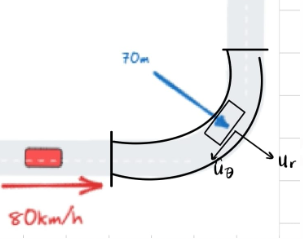

<img src="im_2_din.jpeg">

8. Grafique la fricción sobre el vehículo en función del recorrido en metros desde que entra hasta que sale de la curva suponiendo que la recorre con la velocidad esperada de 80 km/h.

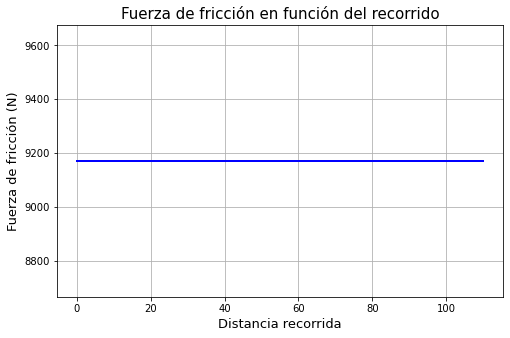

In [28]:
#Hacemos sumatoria de fuerza en X
#-Fr(fuerza de fricción) = m*a

# Datos
m = 1300  # kg
g = 9.81  # m/s² (aceleración debida a la gravedad)
p = 70  # radio de la curva en metros
v = (80/3.6)  # conversión de km/h a m/s

x_valores = []
theta = np.linspace(0, 90, 100)
for i in theta:
    dist = p*(np.deg2rad(i))
    x_valores.append(dist)

a = v**2/p
Fr = [(m * a) for i in theta] 

# Crear arrays para los valores de x e y en el gráfico
x = x_valores
y = Fr

# Configurar y mostrar el gráfico
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))
plt.title('Fuerza de fricción en función del recorrido', fontsize=15)
plt.ylabel('Fuerza de fricción (N)', fontsize=13)
plt.xlabel('Distancia recorrida', fontsize=13)
plt.plot(x, y, color='blue', linewidth=2)
plt.grid()
plt.show()



9. Grafique la fricción sobre el vehículo en función del recorrido en metros desde que entra hasta que sale de la curva suponiendo que la recorre con la velocidad esperada de 80 km/h, pero en el punto C en la mitad de la curva, decide pisar los frenos desacelerando constantemente hasta reducir su velocidad a 60 km/h en 1.5 s. 

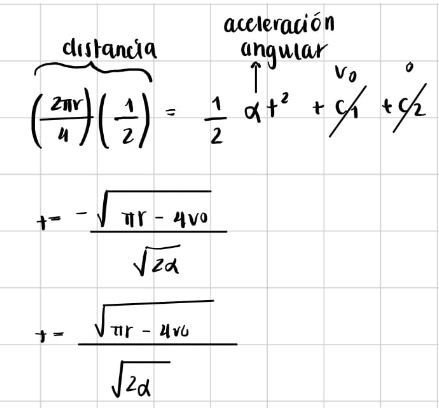
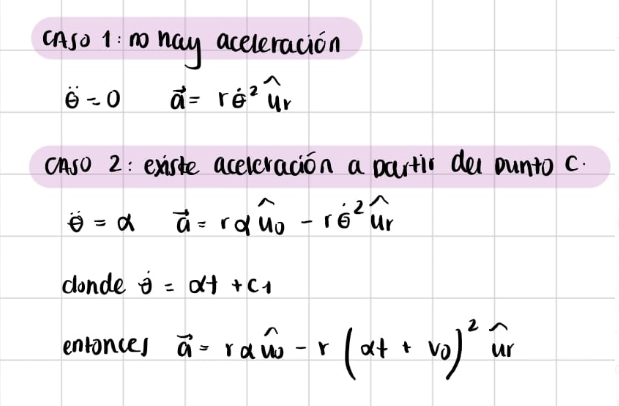

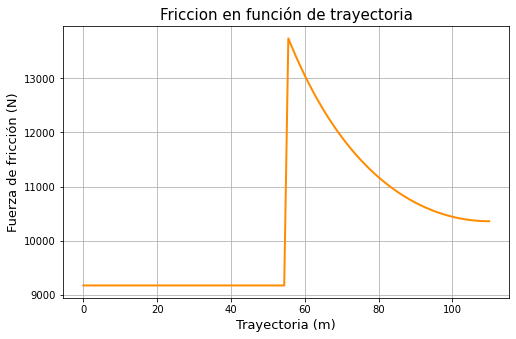

In [27]:
from sympy import symbols, sqrt,sin
import numpy as np
v_fc = 80/3.6  #m/s
v_ic = 60/3.6  # m/s
d_tiempoc = 1.5  #seg

# Aceleración tangencial
acel_t = ((v_fc - v_ic) / d_tiempoc)

x_valores_1 = []
friccion = []
for i in theta:
    dist = p*(np.deg2rad(i))
    x_valores_1.append(dist)

    if i>=0 and i<45:
        a_n = v**2/p
        Fr= m *a_n
        friccion.append(Fr)
    elif i>45 and i<=90:
        Fr = m*(sqrt(acel_t**2+(v_fc**2/(p*sin(np.deg2rad(i))))**2))
        friccion.append(Fr)

hor = 8
ver = 5
plt.figure(figsize=(hor, ver))
plt.title('Friccion en función de trayectoria', fontsize=15) # Título
plt.ylabel('Fuerza de fricción (N)', fontsize=13) # Etiqueta eje vertical
plt.xlabel('Trayectoria (m)', fontsize=13) # Etiqueta eje horizontal
plt.plot(x_valores_1, friccion, color='darkorange', linewidth=2)
plt.grid()
    

In [ ]:
from sympy import symbols, sqrt
#velocidad 


In [ ]:
from sympy import symbols, sqrt
v_fc = 80/3.6  #m/s
v_ic = 60/3.6  # m/s
d_tiempoc = 1.5  #seg

# Aceleración tangencial
acel_t = ((v_fc - v_ic) / d_tiempoc)

x_valores_1 = []
friccion = []
for i in theta:
    dist = p*(np.deg2rad(i))
    x_valores_1.append(dist)

    if i<45:
        a_n = v**2/p
        Fr= m * a_n
        friccion.append(Fr)
    elif i>45:
        a_t = acel_t
        Fr = m*(sqrt(acel_t**2+(v_fc**2/p)**2))
        friccion.append(Fr)

10. El coeficiente de fricción entre las llantas y el vehículo es aproximadamente 0.8 en buenas condiciones, pero puede reducirse a 0.5 en la lluvia y hasta 0.2 en la nieve. Compare el resultado de las gráficas anteriores (5-6), respecto a la máxima fricción que puede sostener el vehículo en las diferentes condiciones climáticas.

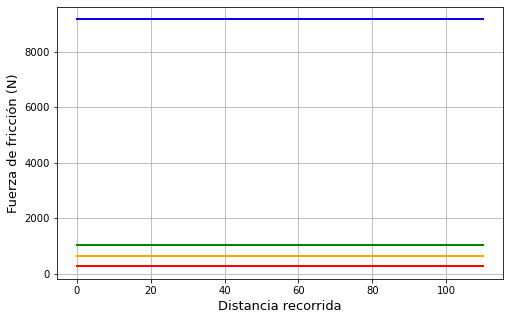

In [33]:
x_valores = []
theta = np.linspace(0, 90, 100)
for i in theta:
    dist = p*(np.deg2rad(i))
    x_valores.append(dist)

a = v**2/p
Fr = [(m * a) for i in theta] 

# Crear arrays para los valores de x e y en el gráfico
x = x_valores
y = Fr
y_1 = [(0.8*m) for i in theta] #buenas condiciones
y_2 = [(0.5*m) for i in theta] #lluvia
y_3 = [(0.2*m) for i in theta] #nieve
# Configurar y mostrar el gráfico
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))
plt.ylabel('Fuerza de fricción (N)', fontsize=13)
plt.xlabel('Distancia recorrida', fontsize=13)
plt.plot(x, y, color='blue', linewidth=2,label='Coeficiente desconocido')
plt.plot(x, y_1, color='green', linewidth=2,label='Buenas condiciones')
plt.plot(x, y_2, color='orange', linewidth=2,label='Lluvia')
plt.plot(x, y_3, color='red', linewidth=2,label='Nieve')
plt.grid()
plt.show()

11. El conductor decide frenar un poco estando a 30 m antes de entrar a la cueva. Calcule una mínima desaceleración constante que le permitiría al vehículo tomar la curva en la lluvia. Comente sobre la seguridad de esta maniobra. 